In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

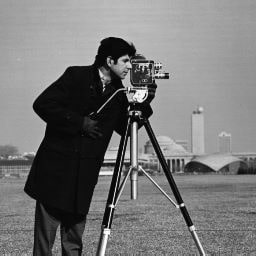

In [28]:
image = cv2.imread('/content/cameraman.jpg')
image
cv2_imshow(image)

In [ ]:
# Image scaling (resizing)
scale_factor = 4
scaled_image = cv2.resize(image, None, fx=scale_factor, fy=5)

Original Image


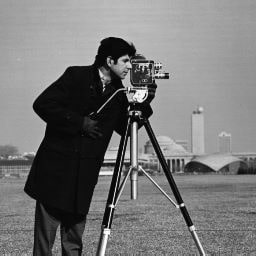

Scaled Image


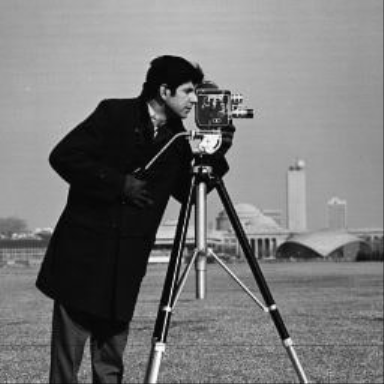

In [20]:
import cv2
import numpy as np

# Load an image
image = cv2.imread('cameraman.jpg')

# Define the scale factors for x and y directions
scale_x = 1.5  # Increase for scaling up, decrease for scaling down
scale_y = 1.5  # Increase for scaling up, decrease for scaling down

# Define the translation matrix for scaling
translation_matrix = np.array([[scale_x, 0, 0],
                               [0, scale_y, 0]], dtype=np.float32)

# Apply the translation matrix to the image
scaled_image = cv2.warpAffine(image, translation_matrix, (int(image.shape[1]*scale_x), int(image.shape[0]*scale_y)))

# Display the original and scaled images
print('Original Image')
cv2_imshow(image)
print('Scaled Image')
cv2_imshow(scaled_image)

cv2.waitKey(0)
cv2.destroyAllWindows()


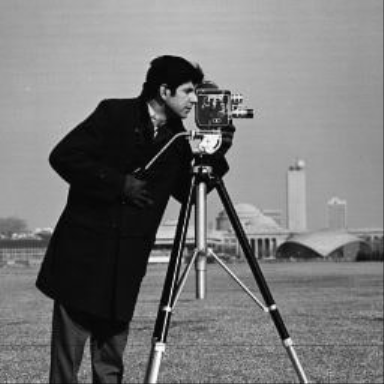

In [ ]:
cv2_imshow(scaled_image)

In [ ]:
# Image zooming
zoom_factor = .5
h, w, _ = image.shape
zoomed_image = image[int(h*(1-zoom_factor)/2):int(h*(1+zoom_factor)/2), int(w*(1-zoom_factor)/2):int(w*(1+zoom_factor)/2)]

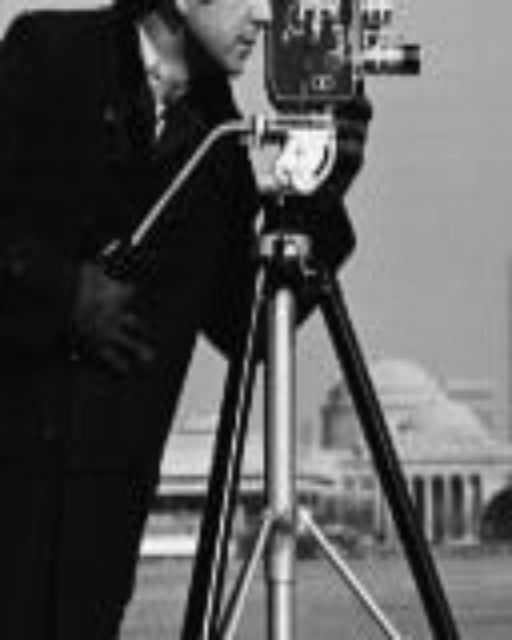

In [ ]:

scale_factor = 4
scaled_image = cv2.resize(zoomed_image, None, fx=scale_factor, fy=5)
cv2_imshow(scaled_image)

In [ ]:
# Image shearing
shear_matrix = np.float32([[1, 0.35, 0], [0.35, 1, 0]])
sheared_image = cv2.warpAffine(image, shear_matrix, (w, h))

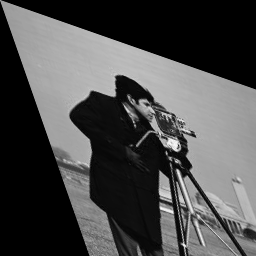

In [ ]:
cv2_imshow(sheared_image)

In [ ]:
# Image rotation
angle = 90
rotation_matrix = cv2.getRotationMatrix2D((w/2, h/2), angle, 1)
rotated_image = cv2.warpAffine(image, rotation_matrix, (w, h))


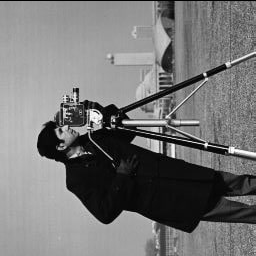

In [ ]:
cv2_imshow(rotated_image)

In [ ]:
import cv2
import numpy as np

# Load an image
image = cv2.imread('/content/cameraman.jpg')

# Specify the video output file
output_file = 'rotation_video.avi'

# Get image dimensions
height, width = image.shape[:2]

# Define the video codec and create a VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
fps = 30
video_writer = cv2.VideoWriter(output_file, fourcc, fps, (width, height))

# Set the rotation angle and increment
rotation_angle = 0
rotation_increment = 1

diagonal_length = int(np.sqrt(height ** 2 + width ** 2))


# Generate frames and write to the video file
for _ in range(360):  # Rotate the image for 360 frames
    # Rotate the image
    rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), rotation_angle, 1)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))

    # Write the frame to the video file
    video_writer.write(rotated_image)

    # Increment the rotation angle
    rotation_angle += rotation_increment

# Release the VideoWriter object
video_writer.release()

print(f"Video saved to {output_file}")


Video saved to rotation_video.avi


In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
# Load an image
image = cv2.imread('/content/cameraman.jpg')

# Get image dimensions
height, width, _ = image.shape



# Define the video writer
fourcc = cv2.VideoWriter_fourcc(*'XVID')  # Video codec
output_video = cv2.VideoWriter('output_video.avi', fourcc, 30, (width, height))

# Set the initial scale factor and scaling increment
scale_factor = 1.0
scale_factor_increment = 0.01  # You can change this value to control the scaling speed

# Loop to create the scaling effect and write frames to the video
for _ in range(100):  # You can adjust the number of frames and duration
    # Resize the image with the current scale factor
    scaled_image = cv2.resize(image, None, fx=scale_factor, fy=scale_factor)

    # Write the scaled frame to the video
    output_video.write(scaled_image)

    # Increment the scale factor (zoom in or out)
    scale_factor += scale_factor_increment

# Release the video writer
output_video.release()

# Display the video
cap = cv2.VideoCapture('output_video.avi')
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
    cv2.imshow('Scaling Image Video', frame)
    if cv2.waitKey(10) & 0xFF == 27:  # Press 'Esc' to exit
        break

# Release the video player and close all windows
cap.release()
cv2.destroyAllWindows()


DisabledFunctionError: ignored

### **Histogram Equalization**

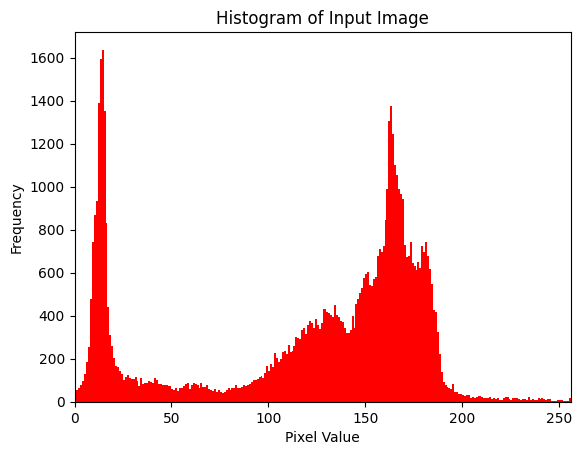

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the input image
input_image = cv2.imread('cameraman.jpg', cv2.IMREAD_GRAYSCALE)

# Calculate and display the histogram of the input image
hist, bins = np.histogram(input_image.flatten(), 256, [0, 256])
plt.hist(input_image.flatten(), 256, [0, 256], color='r')
plt.xlim([0, 256])
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Histogram of Input Image')
plt.show()

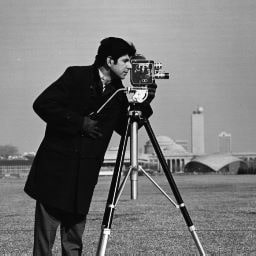

In [ ]:
input_image
cv2_imshow(input_image)

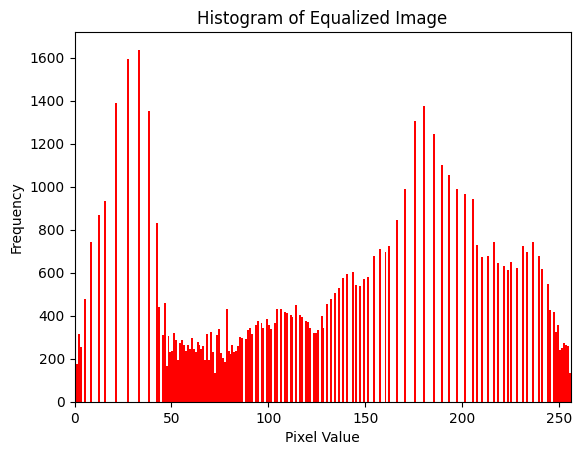

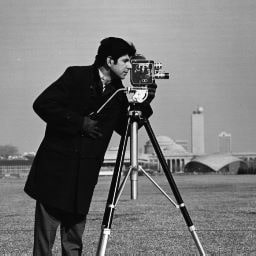

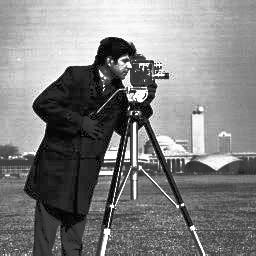

In [12]:
# Perform histogram equalization
equalized_image = cv2.equalizeHist(input_image)

# Calculate and display the histogram of the equalized image
equalized_hist, _ = np.histogram(equalized_image.flatten(), 256, [0, 256])
plt.hist(equalized_image.flatten(), 256, [0, 256], color='r')
plt.xlim([0, 256])
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Histogram of Equalized Image')
plt.show()

# Display the input image and the equalized image
input_image
cv2_imshow(input_image)
equalized_image
cv2_imshow(equalized_image)

# Wait for a key press and then close the windows
cv2.waitKey(0)
cv2.destroyAllWindows()

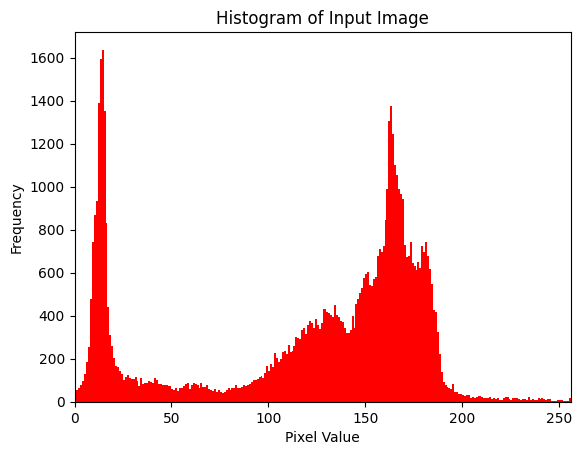

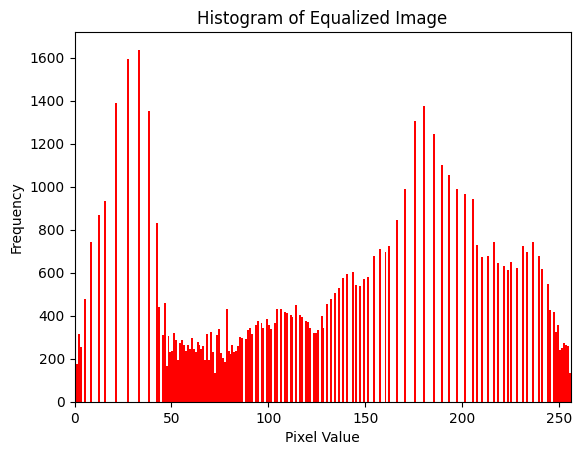

Original Image


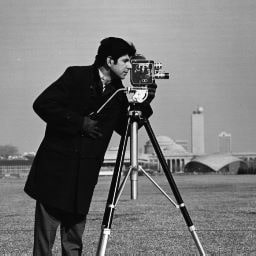

Equalized Image


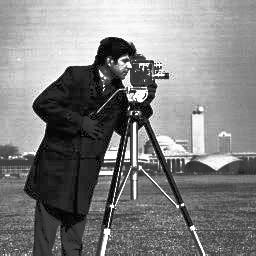

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the input image
input_image = cv2.imread('cameraman.jpg', cv2.IMREAD_GRAYSCALE)

# Calculate and display the histogram of the input image
hist, bins = np.histogram(input_image.flatten(), 256, [0, 256])
plt.hist(input_image.flatten(), 256, [0, 256], color='r')
plt.xlim([0, 256])
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Histogram of Input Image')
plt.show()

# Perform histogram equalization
equalized_image = cv2.equalizeHist(input_image)

# Calculate and display the histogram of the equalized image
equalized_hist, _ = np.histogram(equalized_image.flatten(), 256, [0, 256])
plt.hist(equalized_image.flatten(), 256, [0, 256], color='r')
plt.xlim([0, 256])
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.title('Histogram of Equalized Image')
plt.show()

# Display the input image and the equalized image
print('Original Image')
input_image
cv2_imshow(input_image)
print('Equalized Image')
equalized_image
cv2_imshow(equalized_image)

# Wait for a key press and then close the windows
cv2.waitKey(0)
cv2.destroyAllWindows()

### **Image Scalling**

Original Image


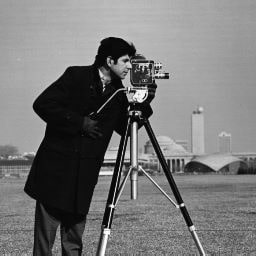

Scaled Image


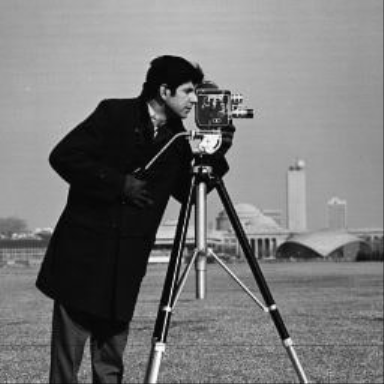

In [21]:
import cv2
import numpy as np

# Load an image
image = cv2.imread('cameraman.jpg')

# Define the scale factors for x and y directions
scale_x = 1.5  # Increase for scaling up, decrease for scaling down
scale_y = 1.5  # Increase for scaling up, decrease for scaling down

# Define the translation matrix for scaling
translation_matrix = np.array([[scale_x, 0, 0],
                               [0, scale_y, 0]], dtype=np.float32)

# Apply the translation matrix to the image
scaled_image = cv2.warpAffine(image, translation_matrix, (int(image.shape[1]*scale_x), int(image.shape[0]*scale_y)))

# Display the original and scaled images
print('Original Image')
cv2_imshow(image)
print('Scaled Image')
cv2_imshow(scaled_image)

cv2.waitKey(0)
cv2.destroyAllWindows()

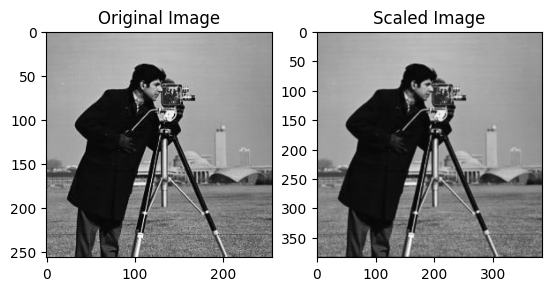

In [25]:

# Original image
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# Scaled image
plt.subplot(1, 2, 2)
plt.title("Scaled Image")
plt.imshow(cv2.cvtColor(scaled_image, cv2.COLOR_BGR2RGB))

plt.show()

### **Image Zooming**

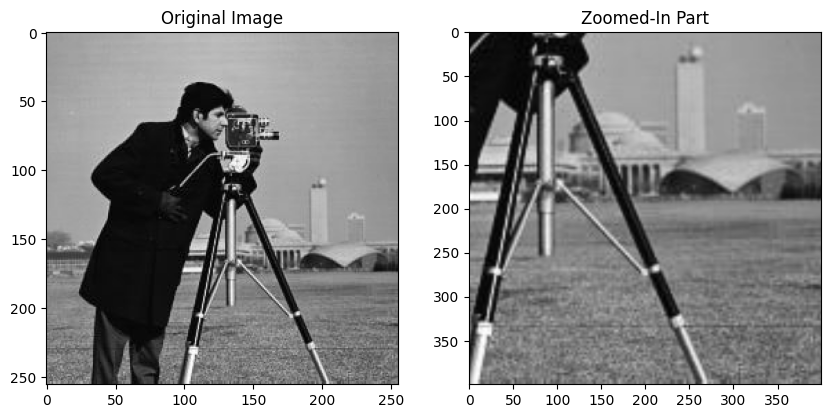

In [22]:
import cv2
import matplotlib.pyplot as plt

# Load the input image
input_image = cv2.imread('cameraman.jpg')

# Define the coordinates of the ROI (region of interest)
x, y, width, height = 100, 100, 200, 200  # Example coordinates, adjust as needed

# Extract the ROI from the input image
roi = input_image[y:y+height, x:x+width]

# Resize the ROI to create the zoomed-in effect
zoomed_in_roi = cv2.resize(roi, (width * 2, height * 2))

# Create subplots to display both the original image and the zoomed-in part
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))

# Zoomed-in part
plt.subplot(1, 2, 2)
plt.title("Zoomed-In Part")
plt.imshow(cv2.cvtColor(zoomed_in_roi, cv2.COLOR_BGR2RGB))

plt.show()

### **Image Rotation and Rotation Video**

In [26]:
import cv2
import numpy as np

# Load an image
image = cv2.imread('/content/cameraman.jpg')

# Specify the video output file
output_file = 'rotation_video.avi'

# Get image dimensions
height, width = image.shape[:2]

# Define the video codec and create a VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'XVID')
fps = 30
video_writer = cv2.VideoWriter(output_file, fourcc, fps, (width, height))

# Set the rotation angle and increment
rotation_angle = 0
rotation_increment = 1

diagonal_length = int(np.sqrt(height ** 2 + width ** 2))


# Generate frames and write to the video file
for _ in range(360):  # Rotate the image for 360 frames
    # Rotate the image
    rotation_matrix = cv2.getRotationMatrix2D((width / 2, height / 2), rotation_angle, 1)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))

    # Write the frame to the video file
    video_writer.write(rotated_image)

    # Increment the rotation angle
    rotation_angle += rotation_increment

# Release the VideoWriter object
video_writer.release()

print(f"Video saved to {output_file}")

Video saved to rotation_video.avi


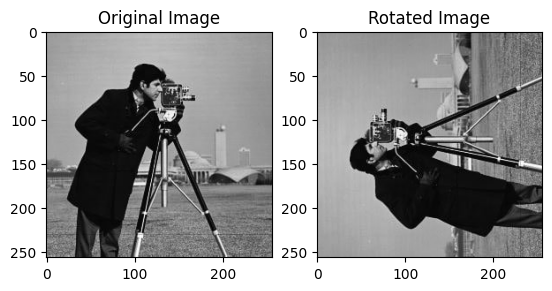

In [37]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
image = cv2.imread('/content/cameraman.jpg')

# Image rotation
h, w, _ = image.shape
angle = 90
rotation_matrix = cv2.getRotationMatrix2D((w/2, h/2), angle, 1)
rotated_image = cv2.warpAffine(image, rotation_matrix, (w, h))

# Original Image
plt.subplot(1, 2, 1)
plt.title("Original Image")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# Rotated Image
plt.subplot(1, 2, 2)
plt.title("Rotated Image")
plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))

plt.show()

### **Image Shrinking**

Original Image


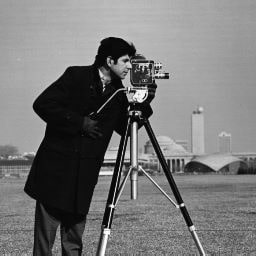

Shrinked Image


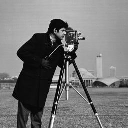

In [41]:
#Similar as scalling
#Shrinking = Scalling down (factor is less than 1)
import cv2
import numpy as np

# Load an image
image = cv2.imread('cameraman.jpg')

# Define the scale factors for x and y directions
scale_x = .5  # Increase for scaling up, decrease for scaling down
scale_y = .5  # Increase for scaling up, decrease for scaling down

# Define the translation matrix for scaling
translation_matrix = np.array([[scale_x, 0, 0],
                               [0, scale_y, 0]], dtype=np.float32)

# Apply the translation matrix to the image
scaled_image = cv2.warpAffine(image, translation_matrix, (int(image.shape[1]*scale_x), int(image.shape[0]*scale_y)))

# Display the original and scaled images
print('Original Image')
cv2_imshow(image)
print('Shrinked Image')
cv2_imshow(scaled_image)

cv2.waitKey(0)
cv2.destroyAllWindows()

### **Video Making**

In [48]:
import cv2
import numpy as np

# Load the input image
input_image = cv2.imread('cameraman.jpg')

# Get image dimensions
height, width, _ = input_image.shape

# Define the scale factors
scale_up_factor = 5.0
scale_down_factor = 0.3

# Define the rotation angle
rotation_angle = 45

# Create a VideoWriter object to save the video
fourcc = cv2.VideoWriter_fourcc(*'XVID')
output_video = cv2.VideoWriter('output_video.avi', fourcc, 1.0, (width, height))

# Define the number of frames for each operation
num_frames = 60

# Perform zooming, shrinking, rotation, scaling, and histogram equalization
for frame_count in range(num_frames):
    # Zoom in (scaling up)
    zoomed_image = cv2.resize(input_image, (int(width * scale_up_factor), int(height * scale_up_factor)))

    # Shrink (scaling down)
    shrunken_image = cv2.resize(input_image, (int(width * scale_down_factor), int(height * scale_down_factor)))

    # Rotate
    rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2), frame_count * rotation_angle, 1)
    rotated_image = cv2.warpAffine(input_image, rotation_matrix, (width, height))

    # Scale (scaling with a factor)
    scale_factor = frame_count * 0.01 + 1.0
    scaled_image = cv2.resize(input_image, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_CUBIC)

    # Histogram equalization
    gray_image = cv2.cvtColor(input_image, cv2.COLOR_BGR2GRAY)
    equalized_image = cv2.equalizeHist(gray_image)
    equalized_image = cv2.cvtColor(equalized_image, cv2.COLOR_GRAY2BGR)

    # Write the processed frames to the video
    output_video.write(np.uint8(zoomed_image))
    output_video.write(np.uint8(shrunken_image))
    output_video.write(np.uint8(rotated_image))
    output_video.write(np.uint8(scaled_image))
    output_video.write(equalized_image)

# Release the VideoWriter
output_video.release()

# Close all OpenCV windows
cv2.destroyAllWindows()